## opencv의 이미지와 영상 처리
* python에서 사용되는 이미지 라이브러리는 대표적으로 PIL, skimage, opencv 3가지가 있다.

### PIL 패키지를 이용해 이미지 로드

In [2]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2024-04-17 13:15:08--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.1s    

2024-04-17 13:15:09 (2.83 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



<class 'PIL.JpegImagePlugin.JpegImageFile'>


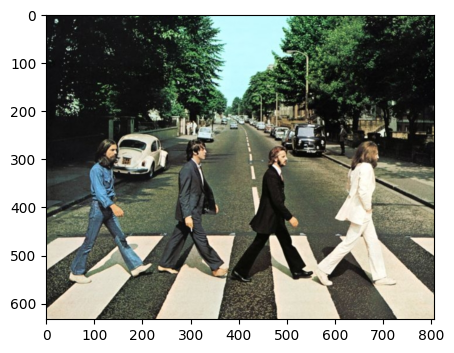

In [3]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image

# PIL은 open()으로 image file을 읽어서 ImageFile 객체로 생성
# 반면에 skimage나 opencv는 받은 image를 numpy array로 만든다.

pil_image = Image.open('/content/data/beatles01.jpg')
print(type(pil_image))

plt.figure(figsize=(5,5))
plt.imshow(pil_image)

### skimage로 이미지 로드하기

<class 'numpy.ndarray'>
(633, 806, 3)


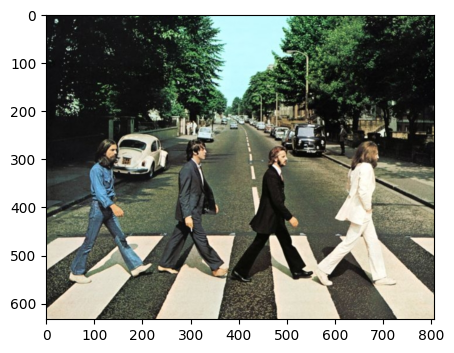

In [4]:
from skimage import io

# skimage는 imread()를 이용해 image를 numpy array로 반환
sk_image = io.imread('/content/data/beatles01.jpg')
print(type(sk_image))
print(sk_image.shape)

plt.figure(figsize=(5,5))
plt.imshow(sk_image)

### opencv에서 이미지 로드하기
* opencv는 imread()를 이용하여 원본 RGB 이미지를 BGR 형태의 numpy array로 반환
* opencv의 imwrite()를 이용하면 BGR 형태의 이미지를 기록할 때 다시 RGB 형태로 변환해준다.

<class 'numpy.ndarray'>
(633, 806, 3)


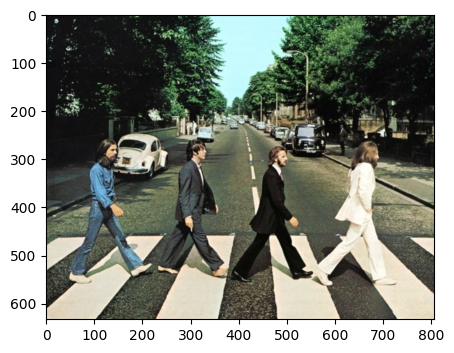

In [5]:
import cv2

cv2_image = cv2.imread('/content/data/beatles01.jpg')
cv2.imwrite('/content/data/beatles02.jpg', cv2_image)
print(type(cv2_image))
print(cv2_image.shape)

plt.figure(figsize=(5,5))
img = plt.imread('/content/data/beatles02.jpg')
plt.imshow(img)

### opencv 영상처리
* opencv는 영상처리를 할 수 있는 API를 제공
* VideoCapture 객체는 Video Streaming을 frame 단위로 capture하여 처리할 수 있는 기능 제공
* VideoWriter 객체는 videocaputer로 읽어들인 frame을 동영상으로 write하는 기능을 제공한다

In [14]:
!mkdir /content/data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

mkdir: cannot create directory ‘/content/data’: File exists
--2024-04-17 14:02:29--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2024-04-17 14:02:29--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2024-04-17 14:02:29--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.

In [15]:
import cv2

video_input_path = '/content/data/Night_Day_Chase.mp4'
video_output_path = '/content/data/Night_Day_Chase_out.mp4'

cap = cv2.VideoCapture(video_input_path)

# codec은 *'XVID'로 설정
codec = cv2.VideoWriter_fourcc(*'XVID')

# size는 width, height 각각 계산
# fps와 size는 원본 소스와 동일하게 설정
# frame 크기는 가로x세로이다. 배열의 행x열과 혼동주의
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print('total frame: ', frame_cnt,'fps: ' ,round(vid_fps), 'frame size: ',vid_size)

total frame:  1383 fps:  30 frame size:  (1216, 516)


In [16]:
import time

# BGR 기준
green_color = (0, 255, 0)
red_color = (0, 0, 255)

start = time.time()
index = 0
while True:
  hasFrame, img_frame  = cap.read()
  if not hasFrame:
    print('처리해야 하는 frame이 없음')
    break
  index += 1
  print(index, '처리완료')

  cv2.rectangle(img_frame, (300, 100, 700, 200), color=green_color, thickness=2)
  caption = "frame{}".format(index)
  cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, red_color, 1)

  vid_writer.write(img_frame)

print(round(time.time()-start, 4))
vid_writer.release()
cap.release()

1 처리완료
2 처리완료
3 처리완료
4 처리완료
5 처리완료
6 처리완료
7 처리완료
8 처리완료
9 처리완료
10 처리완료
11 처리완료
12 처리완료
13 처리완료
14 처리완료
15 처리완료
16 처리완료
17 처리완료
18 처리완료
19 처리완료
20 처리완료
21 처리완료
22 처리완료
23 처리완료
24 처리완료
25 처리완료
26 처리완료
27 처리완료
28 처리완료
29 처리완료
30 처리완료
31 처리완료
32 처리완료
33 처리완료
34 처리완료
35 처리완료
36 처리완료
37 처리완료
38 처리완료
39 처리완료
40 처리완료
41 처리완료
42 처리완료
43 처리완료
44 처리완료
45 처리완료
46 처리완료
47 처리완료
48 처리완료
49 처리완료
50 처리완료
51 처리완료
52 처리완료
53 처리완료
54 처리완료
55 처리완료
56 처리완료
57 처리완료
58 처리완료
59 처리완료
60 처리완료
61 처리완료
62 처리완료
63 처리완료
64 처리완료
65 처리완료
66 처리완료
67 처리완료
68 처리완료
69 처리완료
70 처리완료
71 처리완료
72 처리완료
73 처리완료
74 처리완료
75 처리완료
76 처리완료
77 처리완료
78 처리완료
79 처리완료
80 처리완료
81 처리완료
82 처리완료
83 처리완료
84 처리완료
85 처리완료
86 처리완료
87 처리완료
88 처리완료
89 처리완료
90 처리완료
91 처리완료
92 처리완료
93 처리완료
94 처리완료
95 처리완료
96 처리완료
97 처리완료
98 처리완료
99 처리완료
100 처리완료
101 처리완료
102 처리완료
103 처리완료
104 처리완료
105 처리완료
106 처리완료
107 처리완료
108 처리완료
109 처리완료
110 처리완료
111 처리완료
112 처리완료
113 처리완료
114 처리완료
115 처리완료
116 처리완료
117 처리완료
118 처리완료
119 처리완료
120 처리완료
121 처리완료
122 처리완료
123 처리완료
1